#### California Housing Regression Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

This is a bunch object which is a special sklearn object
It behaves like a dictionary (housing['data'], housing['target']).

Contains multiple attributes:

housing.data → The actual housing feature data (NumPy array).

housing.target → The target values (median house price).

housing.feature_names → The names of each feature.

housing.DESCR → Description of the dataset.

In [10]:
# train test split of housing data which is a numpy array
X_train_full, X_test, y_train_full, y_test= train_test_split(housing.data, housing.target, test_size=0.25, random_state= 42)

# make a validation set for the compiling
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [11]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

#### Creating the Sequential Model

In [ ]:
# create a model 
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [13]:
# compile
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

In [14]:
# fit the model save as history
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.1923 - val_loss: 0.5397
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4767 - val_loss: 0.4952
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4589 - val_loss: 0.6047
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6438 - val_loss: 0.6073
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4662 - val_loss: 0.4680
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4154 - val_loss: 0.4553
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3934 - val_loss: 0.4390
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3864 - val_loss: 0.4323
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3822 - val_loss: 0.4339
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3786 - val_loss: 0.4293

In [15]:
import matplotlib.pyplot as plt

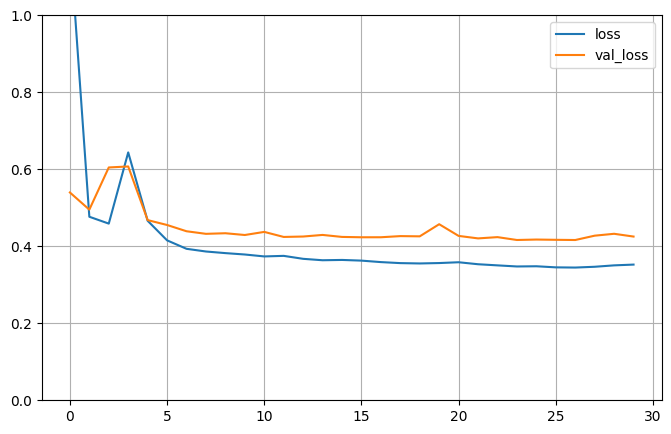

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
# make fake new houses
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 92ms/step


In [19]:
y_pred

array([[0.569771 ],
       [1.5641537],
       [3.1368065]], dtype=float32)

In [21]:
# compare them
y_test[:3]

array([0.477  , 0.458  , 5.00001])

#### Nonsequential Network

One example is when the input layer connects all or part of the inputs directly to the output layer so that the neural network can learn both deep patterns and simple patterns. This is because the deep patterns are learned going the sequential route and the simple patterns are caught by jumping to the output layer.

In [30]:
# nonsequential build
input_ = keras.layers.Input(shape = X_train.shape[1:])
# pass the input to this hidden layer with 30 neurons
hidden_1 = keras.layers.Dense(30, activation='relu')(input_)
# pass the output from the first hidden layer to this hidden layer
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)
# concatenate the input and the ouput of the second hidden layer
concat = keras.layers.Concatenate()([input_, hidden_2])
# pass in the result of the concatenation to this output layer
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_7[0][0]']          

In [32]:
# compile this model
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [33]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 2.0421 - val_loss: 0.7480
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7115 - val_loss: 0.6387
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6446 - val_loss: 0.5957
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5839 - val_loss: 0.5556
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5345
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5201 - val_loss: 0.5113
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4990 - val_loss: 0.5106
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4785 - val_loss: 0.4874
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4699 - val_loss: 0.4803
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4538 - val_loss: 0.4720